In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## this is part of a kaggle competition https://www.kaggle.com/c/bnp-paribas-cardif-claims-management . The data was unlabeled. The goal was to find out some general insights about it. Each line represents data from an individual customer.

In [2]:
pd.set_option('display.max_columns', 1000)
#read in training data
train = pd.read_csv('train.csv')

In [3]:
train.head() #taking a look at the data. lots of missing data

ID  target        v1        v2 v3        v4         v5        v6        v7  \
0   3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278  3.176895   
1   4       1       NaN       NaN  C       NaN   9.191265       NaN       NaN   
2   5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592  3.928571   
3   6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700  1.987549   
4   8       1       NaN       NaN  C       NaN        NaN       NaN       NaN   

         v8         v9       v10        v11       v12       v13        v14  \
0  0.012941   9.999999  0.503281  16.434108  6.085711  2.866830  11.636387   
1  2.301630        NaN  1.312910        NaN  6.507647       NaN  11.636386   
2  0.019645  12.666667  0.765864  14.756098  6.384670  2.505589   9.603542   
3  0.171947   8.965516  6.542669  16.347483  9.646653  3.903302  14.094723   
4       NaN        NaN  1.050328        NaN  6.320087       NaN  10.991098   

        v15       v16       v17       v18       v19        v20       v21  \
0  1.355013  8.571429  3.670350  0.106720  0.148883  18.869283  7.730923   
1       NaN       NaN       NaN       NaN       NaN        NaN  6.763110   
2  1.984127  5.882353  3.170847  0.244541  0.144258  17.952332  5.245035   
3  1.945044  5.517242  3.610789  1.224114  0.231630  18.376407  7.517125   
4       NaN       NaN       NaN       NaN       NaN        NaN  6.414567   

    v22           v23 v24       v25       v26       v27       v28       v29  \
0   XDX -1.716131e-08   C  0.139412  1.720818  3.393503  0.590122  8.880867   
1   GUV           NaN   C  3.056144       NaN       NaN       NaN       NaN   
2    FQ -2.785053e-07   E  0.113997  2.244897  5.306122  0.836005  7.499999   
3  ACUE -4.805344e-07   D  0.148843  1.308269  2.303640  8.926662  8.874521   
4   HIT           NaN   E       NaN       NaN       NaN       NaN       NaN   

   v30 v31       v32       v33       v34       v35        v36       v37  v38  \
0    C   A  1.083033  1.010829  7.270147  8.375452  11.326592  0.454546    0   
1    C   A       NaN       NaN  3.615077       NaN  14.579479       NaN    0   
2  NaN   A  1.454082  1.734693  4.043864  7.959184  12.730517  0.259740    0   
3    C   B  1.587644  1.666667  8.703550  8.898468  11.302795  0.433735    0   
4  NaN   A       NaN       NaN  6.083151       NaN        NaN       NaN    0   

        v39        v40       v41        v42       v43        v44       v45  \
0  4.012088   7.711453  7.653429  12.707581  2.015505  10.498338  9.848672   
1       NaN  14.305766       NaN        NaN       NaN        NaN       NaN   
2  7.378964  13.077201  6.173469  12.346939  2.926830   8.897561  5.343819   
3  0.287322  11.523045  7.931035  12.935823  1.470878  12.708574  9.670823   
4       NaN  10.138920       NaN        NaN       NaN        NaN       NaN   

        v46 v47        v48       v49       v50       v51 v52        v53  \
0  0.113561   C  12.171733  8.086643  0.899420  7.277792   G  16.747968   
1  2.449959   E        NaN       NaN  1.379210       NaN   G        NaN   
2  0.126035   C  12.711328  6.836734  0.604504  9.637627   F  15.102041   
3  0.108387   C  12.194855  8.591954  3.329176  4.780357   H  16.621695   
4       NaN   I        NaN       NaN  1.364536       NaN   H        NaN   

        v54       v55  v56       v57       v58        v59       v60  \
0  0.037096  1.299638   DI  3.971118  0.529802  10.890984  1.588448   
1  1.129469       NaN   DY       NaN       NaN        NaN       NaN   
2  0.085573  0.765305   AS  4.030613  4.277456   9.105481  2.151361   
3  0.139721  1.178161   BW  3.965517  1.732102  11.777912  1.229246   
4       NaN       NaN  NaN       NaN       NaN        NaN       NaN   

         v61  v62       v63       v64        v65 v66       v67        v68  \
0  15.858152    1  0.153461  6.363189  18.303925   C  9.314079  15.231789   
1        NaN    2  2.544736       NaN        NaN   A       NaN        NaN   
2  16.075602    1  0.123643  5.517949  16.377205   A  8.

In [4]:
train.shape #lots of features both numeric and categorical

(114321, 133)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.9+ MB


## for categorical columns, determine the number of unique categories for future feature exploration. looks like column v22 has a ton.


In [153]:
for i in train.columns:
    if type(train[i][0]) == str:
        print 'number of labels in column %s:' %i, len(np.unique(train[i]))

number of labels in column v3: 4
number of labels in column v22: 18211
number of labels in column v24: 5
number of labels in column v30: 8
number of labels in column v31: 4
number of labels in column v47: 10
number of labels in column v52: 13
number of labels in column v56: 123
number of labels in column v66: 3
number of labels in column v71: 9
number of labels in column v74: 3
number of labels in column v75: 4
number of labels in column v79: 18
number of labels in column v91: 8
number of labels in column v107: 8
number of labels in column v110: 3
number of labels in column v112: 23
number of labels in column v125: 91


In [3]:
pd.set_option('display.max_rows', 1000)
train = train.drop_duplicates() #remove duplicates

In [8]:
train.shape #no duplicates

(114321, 133)

In [9]:
#count number of NaNs per row. can this be used as a feature?
train['Nancount'] = train.isnull().sum(axis=1)


In [86]:
trainum.columns.values[-1]

'Nancount'

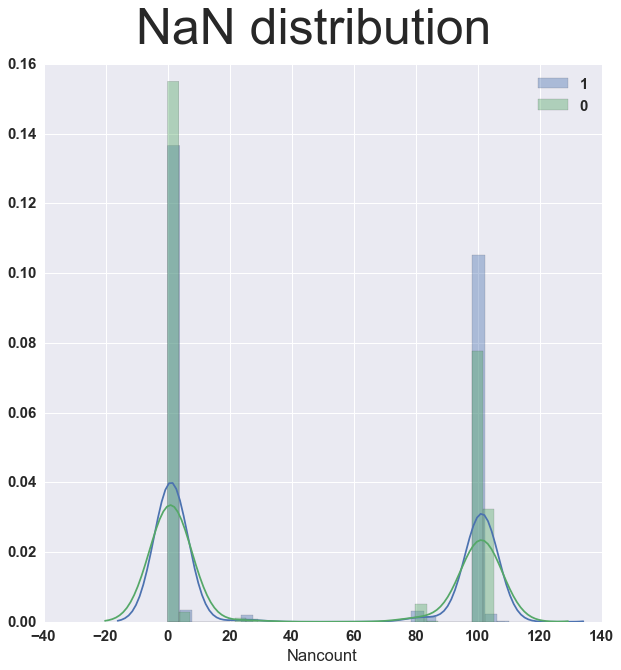

In [158]:
# Distributions of NaNs in good and those requiring check
sns.set(font_scale=1.5)
rawP = train.loc[train['target']==1, :]
rawN = train.loc[train['target']==0, :]
fig, axs = matplotlib.pyplot.subplots(1,1, figsize=(10, 10))
fig.suptitle('NaN distribution',fontsize=50)


i = trainum.columns.values[-1]
sns.distplot(rawP[i].dropna(),  bins=30, kde=True, label='1')
sns.distplot(rawN[i].dropna(), bins=30, kde=True, label='0')
plt.legend()
sns.plt.show()
      
#look very similar!

In [142]:

train2 = train.drop(['Nancount'], axis = 1)
v = train2.apply(lambda x: sum(x.isnull().values), axis=0) #counts of nans per column

(array([   1.5,    2.5,    3.5,    4.5,    5.5,    6.5,    7.5,    8.5,
           9.5,   10.5,   11.5,   12.5,   13.5,   14.5,   15.5,   16.5,
          17.5,   18.5,   19.5,   20.5,   21.5,   22.5,   23.5,   24.5,
          25.5,   26.5,   27.5,   28.5,   29.5,   30.5,   31.5,   32.5,
          33.5,   34.5,   35.5,   36.5,   37.5,   38.5,   39.5,   40.5,
          41.5,   42.5,   43.5,   44.5,   45.5,   46.5,   47.5,   48.5,
          49.5,   50.5,   51.5,   52.5,   53.5,   54.5,   55.5,   56.5,
          57.5,   58.5,   59.5,   60.5,   61.5,   62.5,   63.5,   64.5,
          65.5,   66.5,   67.5,   68.5,   69.5,   70.5,   71.5,   72.5,
          73.5,   74.5,   75.5,   76.5,   77.5,   78.5,   79.5,   80.5,
          81.5,   82.5,   83.5,   84.5,   85.5,   86.5,   87.5,   88.5,
          89.5,   90.5,   91.5,   92.5,   93.5,   94.5,   95.5,   96.5,
          97.5,   98.5,   99.5,  100.5,  101.5,  102.5,  103.5,  104.5,
         105.5,  106.5,  107.5,  108.5,  109.5,  110.5,  111.5, 

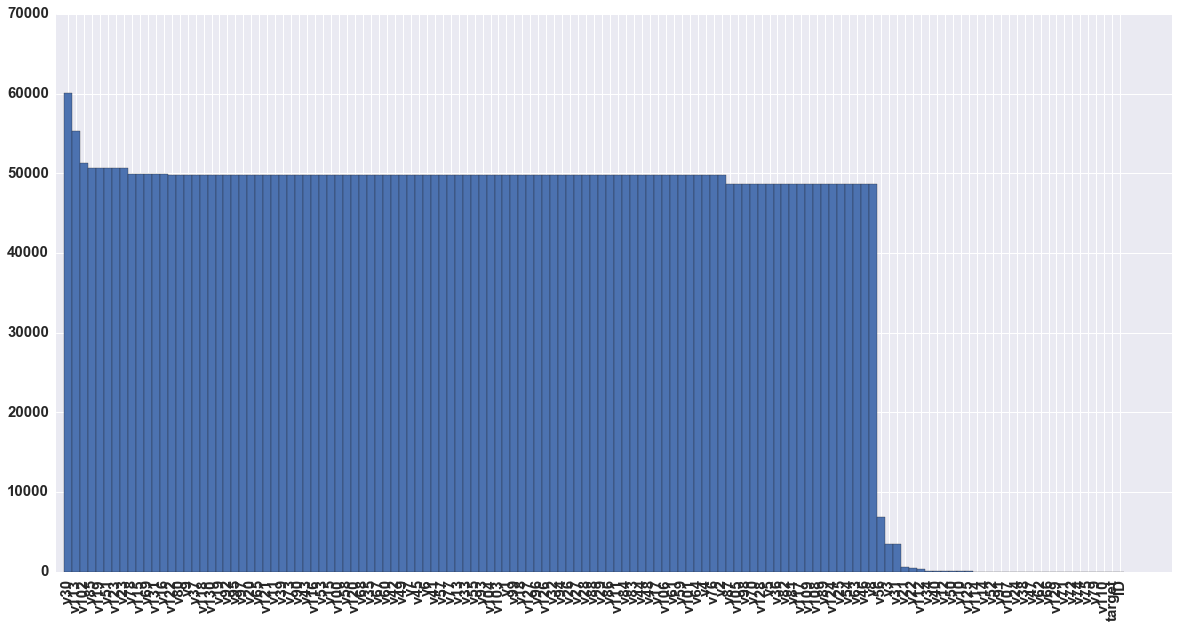

In [143]:
# i stole this code from kaggle, it shows how many NaNs each feature has
import matplotlib 
v.sort_values(ascending=False, inplace=True)  

fig, ax = plt.subplots(figsize=(20, 10))
# plotting
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
n = len(v)
x = np.arange(1, n+1)
plt.bar(x, v, 1)
plt.xticks(x + 1/2.0, v.index)
plt.xticks(rotation=90) # or use 'vertical'



In [144]:
#split the data into target values of 1 or 0 to see if there are any obvious trends
traingood = train[train['target']==1]
traincheck = train[train['target']==0]

In [16]:
traingood.describe() 

ID  target            v1            v2            v4  \
count   87021.000000   87021  4.864500e+04  4.867100e+04  4.867100e+04   
mean   114225.975489       1  1.625671e+00  7.526222e+00  4.184315e+00   
std     65846.179123       0  1.078889e+00  2.959448e+00  1.143377e+00   
min         3.000000       1 -9.996497e-07 -9.817614e-07 -6.475929e-07   
25%     57463.000000       1  9.127361e-01  5.379228e+00  3.535430e+00   
50%    114162.000000       1  1.465830e+00  7.079820e+00  4.236409e+00   
75%    171188.000000       1  2.127602e+00  9.499430e+00  4.864114e+00   
max    228713.000000       1  2.000000e+01  2.000000e+01  2.000000e+01   

                 v5            v6            v7            v8            v9  \
count  4.950400e+04  4.864500e+04  4.864500e+04  4.950900e+04  4.863000e+04   
mean   8.768369e+00  2.446883e+00  2.495146e+00  1.478357e+00  9.018015e+00   
std    2.042876e+00  5.986014e-01  5.918704e-01  2.772320e+00  1.936536e+00   
min   -5.287068e-07 -9.055091e-07 -9.468765e-07 -7.783778e-07 -9.828757e-07   
25%    7.634282e+00  2.073669e+00  2.111959e+00  8.343070e-02  7.836799e+00   
50%    8.688635e+00  2.421564e+00  2.463415e+00  3.746302e-01  9.046305e+00   
75%    9.798108e+00  2.784513e+00  2.847974e+00  1.568086e+00  1.022222e+01   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

                v10           v11           v12           v13           v14  \
count  8.693800e+04  4.864200e+04  8.693600e+04  4.864500e+04  8.701700e+04   
mean   1.999184e+00  1.545273e+01  6.909647e+00  3.781449e+00  1.219996e+01   
std    1.456550e+00  7.923289e-01  9.688970e-01  1.177969e+00  1.493880e+00   
min   -9.875317e-07 -1.459062e-07  5.143224e-07 -8.464889e-07 -9.738831e-07   
25%    1.050329e+00  1.500914e+01  6.309826e+00  3.055986e+00  1.132252e+01   
50%    1.312911e+00  1.550340e+01  6.605469e+00  3.566891e+00  1.206145e+01   
75%    2.363239e+00  1.595400e+01  7.090712e+00  4.262669e+00  1.289117e+01   
max    1.853392e+01  2.000000e+01  1.871055e+01  2.000000e+01  2.000000e+01   

                v15           v16           v17           v18           v19  \
count  4.864200e+04  4.859700e+04  4.867100e+04  4.864500e+04  4.863700e+04   
mean   2.067343e+00  4.913315e+00  3.884222e+00  8.424399e-01  2.212352e-01   
std    7.288988e-01  1.798857e+00  1.936235e+00  6.262376e-01  1.882484e-01   
min   -8.762583e-07 -9.978294e-07 -9.066455e-07  5.468291e-07 -5.178987e-07   
25%    1.600669e+00  3.840001e+00  2.757097e+00  5.003879e-01  1.732687e-01   
50%    1.980499e+00  4.920635e+00  3.584137e+00  7.739069e-01  1.974894e-01   
75%    2.404536e+00  5.957447e+00  4.555346e+00  1.076402e+00  2.362126e-01   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

                v20           v21           v23           v25           v26  \
count  48638.000000  86486.000000  4.799000e+04  49509.000000  4.864500e+04   
mean      17.792365      7.070429  1.018368e+00      1.684468  1.885469e+00   
std        1.149507      1.111060  3.864657e+00      2.958846  5.560921e-01   
min        3.273921      0.106181 -9.999058e-07      0.043063 -9.346696e-07   
25%       17.354549      6.427731 -4.124946e-07      0.149203  1.518046e+00   
50%       18.052886      7.091963  1.725597e-07      0.447247  1.835485e+00   
75%       18.552415      7.739046  7.653040e-07      1.923246  2.189054e+00   
max       20.000001     17.310324  2.000000e+01     20.000001  2.000000e+01   

                v27           v28           v29           v32           v33  \
count  4.864500e+04  4.864500e+04  4.864500e+04  4.864500e+04  4.864500e+04   
mean   2.757167e+00  5.073490e+00  8.223457e+00  1.611770e+00  2.135658e+00   
std    8.386671e-01  2.690154e+00  1.280411e+00  5.593974e-01  9.679627e-01   
min   -9.915986e-07 -6.960880e-07 -3.040753e-07 -9.559960e-07 -9.713108e-07   
25%    2.208420e+00  3.427411e+00  7.446808e+00  1.253481e+00  1.454545e+00   
50%    2.684951e+00  5.031003

In [17]:
traincheck.describe()

ID  target            v1            v2            v4  \
count   27300.000000   27300  1.584400e+04  1.585400e+04  1.585400e+04   
mean   114238.340330       0  1.646081e+00  7.274653e+00  4.024702e+00   
std     66216.399794       0  1.094666e+00  2.960547e+00  1.154877e+00   
min         9.000000       0 -9.989552e-07 -8.757841e-07  7.364053e-07   
25%     56821.750000       0  9.169767e-01  5.095765e+00  3.344086e+00   
50%    114292.000000       0  1.478817e+00  6.850875e+00  4.111200e+00   
75%    171231.500000       0  2.165586e+00  9.295835e+00  4.736899e+00   
max    228705.000000       0  1.436893e+01  1.956943e+01  9.720891e+00   

                 v5            v6            v7            v8            v9  \
count  16193.000000  1.584400e+04  1.584400e+04  16193.000000  1.584000e+04   
mean       8.662844  2.404222e+00  2.449455e+00      1.552248  9.074359e+00   
std        2.012887  6.030152e-01  5.806136e-01      2.814769  1.910307e+00   
min        0.181574 -6.111700e-07 -9.291187e-07      0.000309 -5.680370e-07   
25%        7.545394  2.034968e+00  2.066313e+00      0.097528  7.894737e+00   
50%        8.605211  2.390739e+00  2.416107e+00      0.425398  9.090909e+00   
75%        9.707582  2.743603e+00  2.797147e+00      1.729246  1.027027e+01   
max       18.446536  2.000000e+01  6.666666e+00     20.000001  2.000000e+01   

                v10           v11           v12           v13           v14  \
count  2.729900e+04  15843.000000  27299.000000  1.584400e+04  2.730000e+04   
mean   1.513185e+00     15.431097      6.791044  3.850430e+00  1.175742e+01   
std    1.093370e+00      0.782930      0.759129  1.167993e+00  1.211767e+00   
min   -9.547834e-07      7.900000      3.028570 -7.100968e-07 -1.024361e-07   
25%    1.050327e+00     14.982205      6.364786  3.117920e+00  1.101198e+01   
50%    1.291029e+00     15.475620      6.633072  3.655570e+00  1.167533e+01   
75%    1.575493e+00     15.938461      6.906792  4.362096e+00  1.237894e+01   
max    7.899343e+00     20.000001     11.733539  1.658046e+01  1.747756e+01   

                v15           v16           v17           v18           v19  \
count  1.584300e+04  1.582900e+04  1.585400e+04  1.584400e+04  15841.000000   
mean   2.122566e+00  4.953639e+00  3.672782e+00  8.367643e-01      0.225571   
std    7.435948e-01  1.767138e+00  1.824337e+00  5.846308e-01      0.103367   
min   -8.830427e-07 -9.911444e-07 -1.316457e-07  4.475470e-07      0.071205   
25%    1.653440e+00  3.916085e+00  2.572744e+00  5.314866e-01      0.175839   
50%    2.029521e+00  4.954129e+00  3.432256e+00  7.732000e-01      0.202763   
75%    2.471222e+00  5.962732e+00  4.379232e+00  1.057319e+00      0.244788   
max    1.211504e+01  2.000000e+01  1.811257e+01  2.000000e+01      3.407836   

                v20           v21           v23           v25           v26  \
count  15843.000000  27224.000000  1.565600e+04  16193.000000  1.584400e+04   
mean      17.715960      6.900479  1.322128e+00      1.739897  1.847052e+00   
std        1.169868      0.926709  4.394838e+00      2.950455  5.348606e-01   
min        1.516776      0.869985 -9.999932e-07      0.041043 -7.545438e-07   
25%       17.252105      6.382679 -3.973980e-07      0.151730  1.490286e+00   
50%       17.983910      6.953160  2.221088e-07      0.527273  1.798288e+00   
75%       18.506146      7.472007  8.251777e-07      2.016797  2.150851e+00   
max       20.000001     19.296052  2.000000e+01     20.000001  6.111112e+00   

                v27           v28           v29           v32           v33  \
count  1.584400e+04  1.584400e+04  1.584400e+04  1.584400e+04  1.584400e+04   
mean   2.701353e+00  5.154235e+00  8.154097e+00  1.654021e+00  2.241382e+00   
std    8.195705e-01  2.639238e+00  1.299374e+00  5.748553e-01  1.030966e+00   
min   -7.203914e-07 -3.285401e-07 -2.330801e-07 -7.426802e-07 -9.698838e-07   
25%    2.161204e+00  3.647637e+00  7.366946e+00  1.293225e+00  1.513916e+00   
50%    2.637482e+00  5.090870

In [165]:
print 'percentage of good claims =', float(float(len(traingood))/float(len(train)))*100
print 'percentage of claims to be checked =', float(float(len(traincheck))/float(len(train)))*100

percentage of good claims 76.1198729892
percentage of claims to be checked 23.8801270108


In [146]:
#if I remove all rows with NaNs what am I left with?
traindropcheck = traincheck.dropna(axis=0, how='any')
traindropgood = traingood.dropna(axis=0, how='any')

In [145]:
traindrop = train.dropna(axis=0, how='any')
traindrop.shape #lost a lot of data

(17756, 134)

## keep only columns with numerical values. this is for preliminary analysis of non-categorical features.

In [147]:
columns_list = []
for i in train.columns:
    if type(train[i][0]) != str and i != 'v113':
        columns_list.append(i)
        

In [148]:
#remove categorical variables to plot some trends between known good and unclear claims
trainumeric = traindrop[columns_list]
trainumgood = traindropgood[columns_list]
trainumcheck = traindropcheck[columns_list]


In [149]:
#all training numeric features 
trainum = trainumeric.drop(['ID'], axis = 1)

In [150]:
trainum.head()

target        v1        v2        v4         v5        v6        v7  \
21       1  1.289841  4.788645  4.283417  10.719571  3.107570  1.962151   
63       0  2.495783  9.306134  6.572474  10.292470  3.001686  2.664418   
64       0  2.567534  7.514002  3.363238   5.243808  2.032217  2.299877   
68       1  1.312574  9.353351  5.289176  10.368787  3.342530  2.782814   
73       1  1.095601  6.772009  5.431377  10.202250  1.844332  1.920473   

          v8         v9       v10        v11       v12       v13        v14  \
21  0.080812   8.604652  5.229758  16.275460  9.233140  3.507230  14.376724   
63  0.511063  10.235293  0.787746  14.225232  6.489439  4.440315  11.185820   
64  1.621858   7.568438  0.525164  15.110132  6.099140  4.215789  11.636387   
68  0.287117   8.544892  1.050329  15.277561  6.233500  3.714959  12.148604   
73  7.403780   6.277372  1.050329  16.240929  6.149554  4.526062  10.829276   

         v15       v16       v17       v18       v19        v20       v21  \
21  1.730492  6.730770  2.980920  0.540674  0.247953  18.162636  8.071645   
63  2.936507  4.000000  8.302883  0.924447  0.166746  18.680830  6.817770   
64  2.124495  6.072875  3.219932  1.081349  0.259039  17.279578  7.758779   
68  2.002209  6.111111  6.940872  0.827621  0.176297  18.721419  6.832308   
73  1.026193  4.444444  7.310717  1.031875  0.213928  18.284430  6.263318   

             v23       v25       v26       v27       v28        v29       v32  \
21  5.241149e-07  0.140160  1.479083  1.683267  4.291213   9.233068  1.658367   
63 -6.752721e-07  0.920691  2.581506  3.204047  5.069488   8.853287  2.200676   
64  1.941197e+00  1.377820  1.899215  2.240397  8.625187   7.776951  1.747212   
68 -1.515825e-07  0.438045  2.370253  2.814348  5.422280   9.515175  1.631848   
73  8.448440e-07  9.919603  2.683306  1.455161  5.052384  10.820643  1.091370   

         v33       v34        v35        v36       v37  v38       v39  \
21  2.071714  9.149136  10.697210  12.587746  0.710660    0  0.395964   
63  2.192244  3.442806   6.593591  12.083551  1.012659    0  0.628588   
64  2.448576  7.412196   8.049566  16.651365  1.206896    0  0.056567   
68  1.135198  6.723303   7.552228  12.153607  0.509915    0  0.794513   
73  1.675127  6.705916  11.878173  12.380431  0.616740    0  1.630157   

          v40       v41        v42       v43        v44        v45       v46  \
21   9.497141  8.356574  13.685260  1.571290   8.110799  11.257026  0.133655   
63  14.049634  7.082630  13.077571  2.828112  14.629187   6.058662  0.734861   
64   7.508864  6.800495  13.184634  2.301763  11.568469  10.201936  1.358134   
68   9.126692  7.702011  13.527790  2.564503  14.278406   8.506534  0.430705   
73   9.154185  9.467005  14.543146  2.510886  12.690787   9.170267  7.907481   

          v48        v49       v50       v51        v53       v54       v55  \
21  13.101712   9.153386  1.798841  4.857375  16.763755  0.133756  1.494025   
63   8.936252   7.554806  0.358006  4.372260  14.304762  0.672462  1.593591   
64  12.918940   7.806691  0.906757  8.653602  15.653283  0.812274  1.769517   
68   9.512315   8.198660  1.605164  4.919046  15.509527  0.415652  0.922350   
73   9.568744  10.304568  1.838457  3.964772  16.403440  8.364992  0.710661   

         v57        v58        v59       v60        v61  v62       v63  \
21  4.173307   1.830065  13.452836  1.351263  15.137857    0  0.159213   
63  4.317033  11.253822  10.408986  2.349635  14.692871    1  0.803291   
64  4.084264   6.692810  10.799832  1.644774  15.226682    1  1.383761   
68  4.974379   4.816396  12.171458  2.240178  15.452598    2  0.544437   
73  3.510997  18.602740  14.057316  2.574733  14.947523    1  9.700976   

          v64        v65        v67        v68        v69        v70  v72  \
21   5.348232  16.738678  10.268924  19.137256   9.615384  14.739095    1   
63  11.913634  16.584292   9.957841  17.538226   9.692307  12.543536    1   
64   5.630670  15.349822   9.001239  18.980391   9.635628

In [151]:
traindrop3 = trainum.drop(['target'], axis = 1)
column_list = list(traindrop3.columns.values)
trainmelt = pd.melt(trainum, id_vars=['target'], value_vars=column_list)

In [152]:
trainmelt.head()
sortmelt = trainmelt.sort(['value'], ascending=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


# trying to look at differences between feature values for target 0 or 1 but there are so many it is difficult to see, means are very similar, should i scale features? or maybe categorical features are important? Or I am missing important outliers?



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


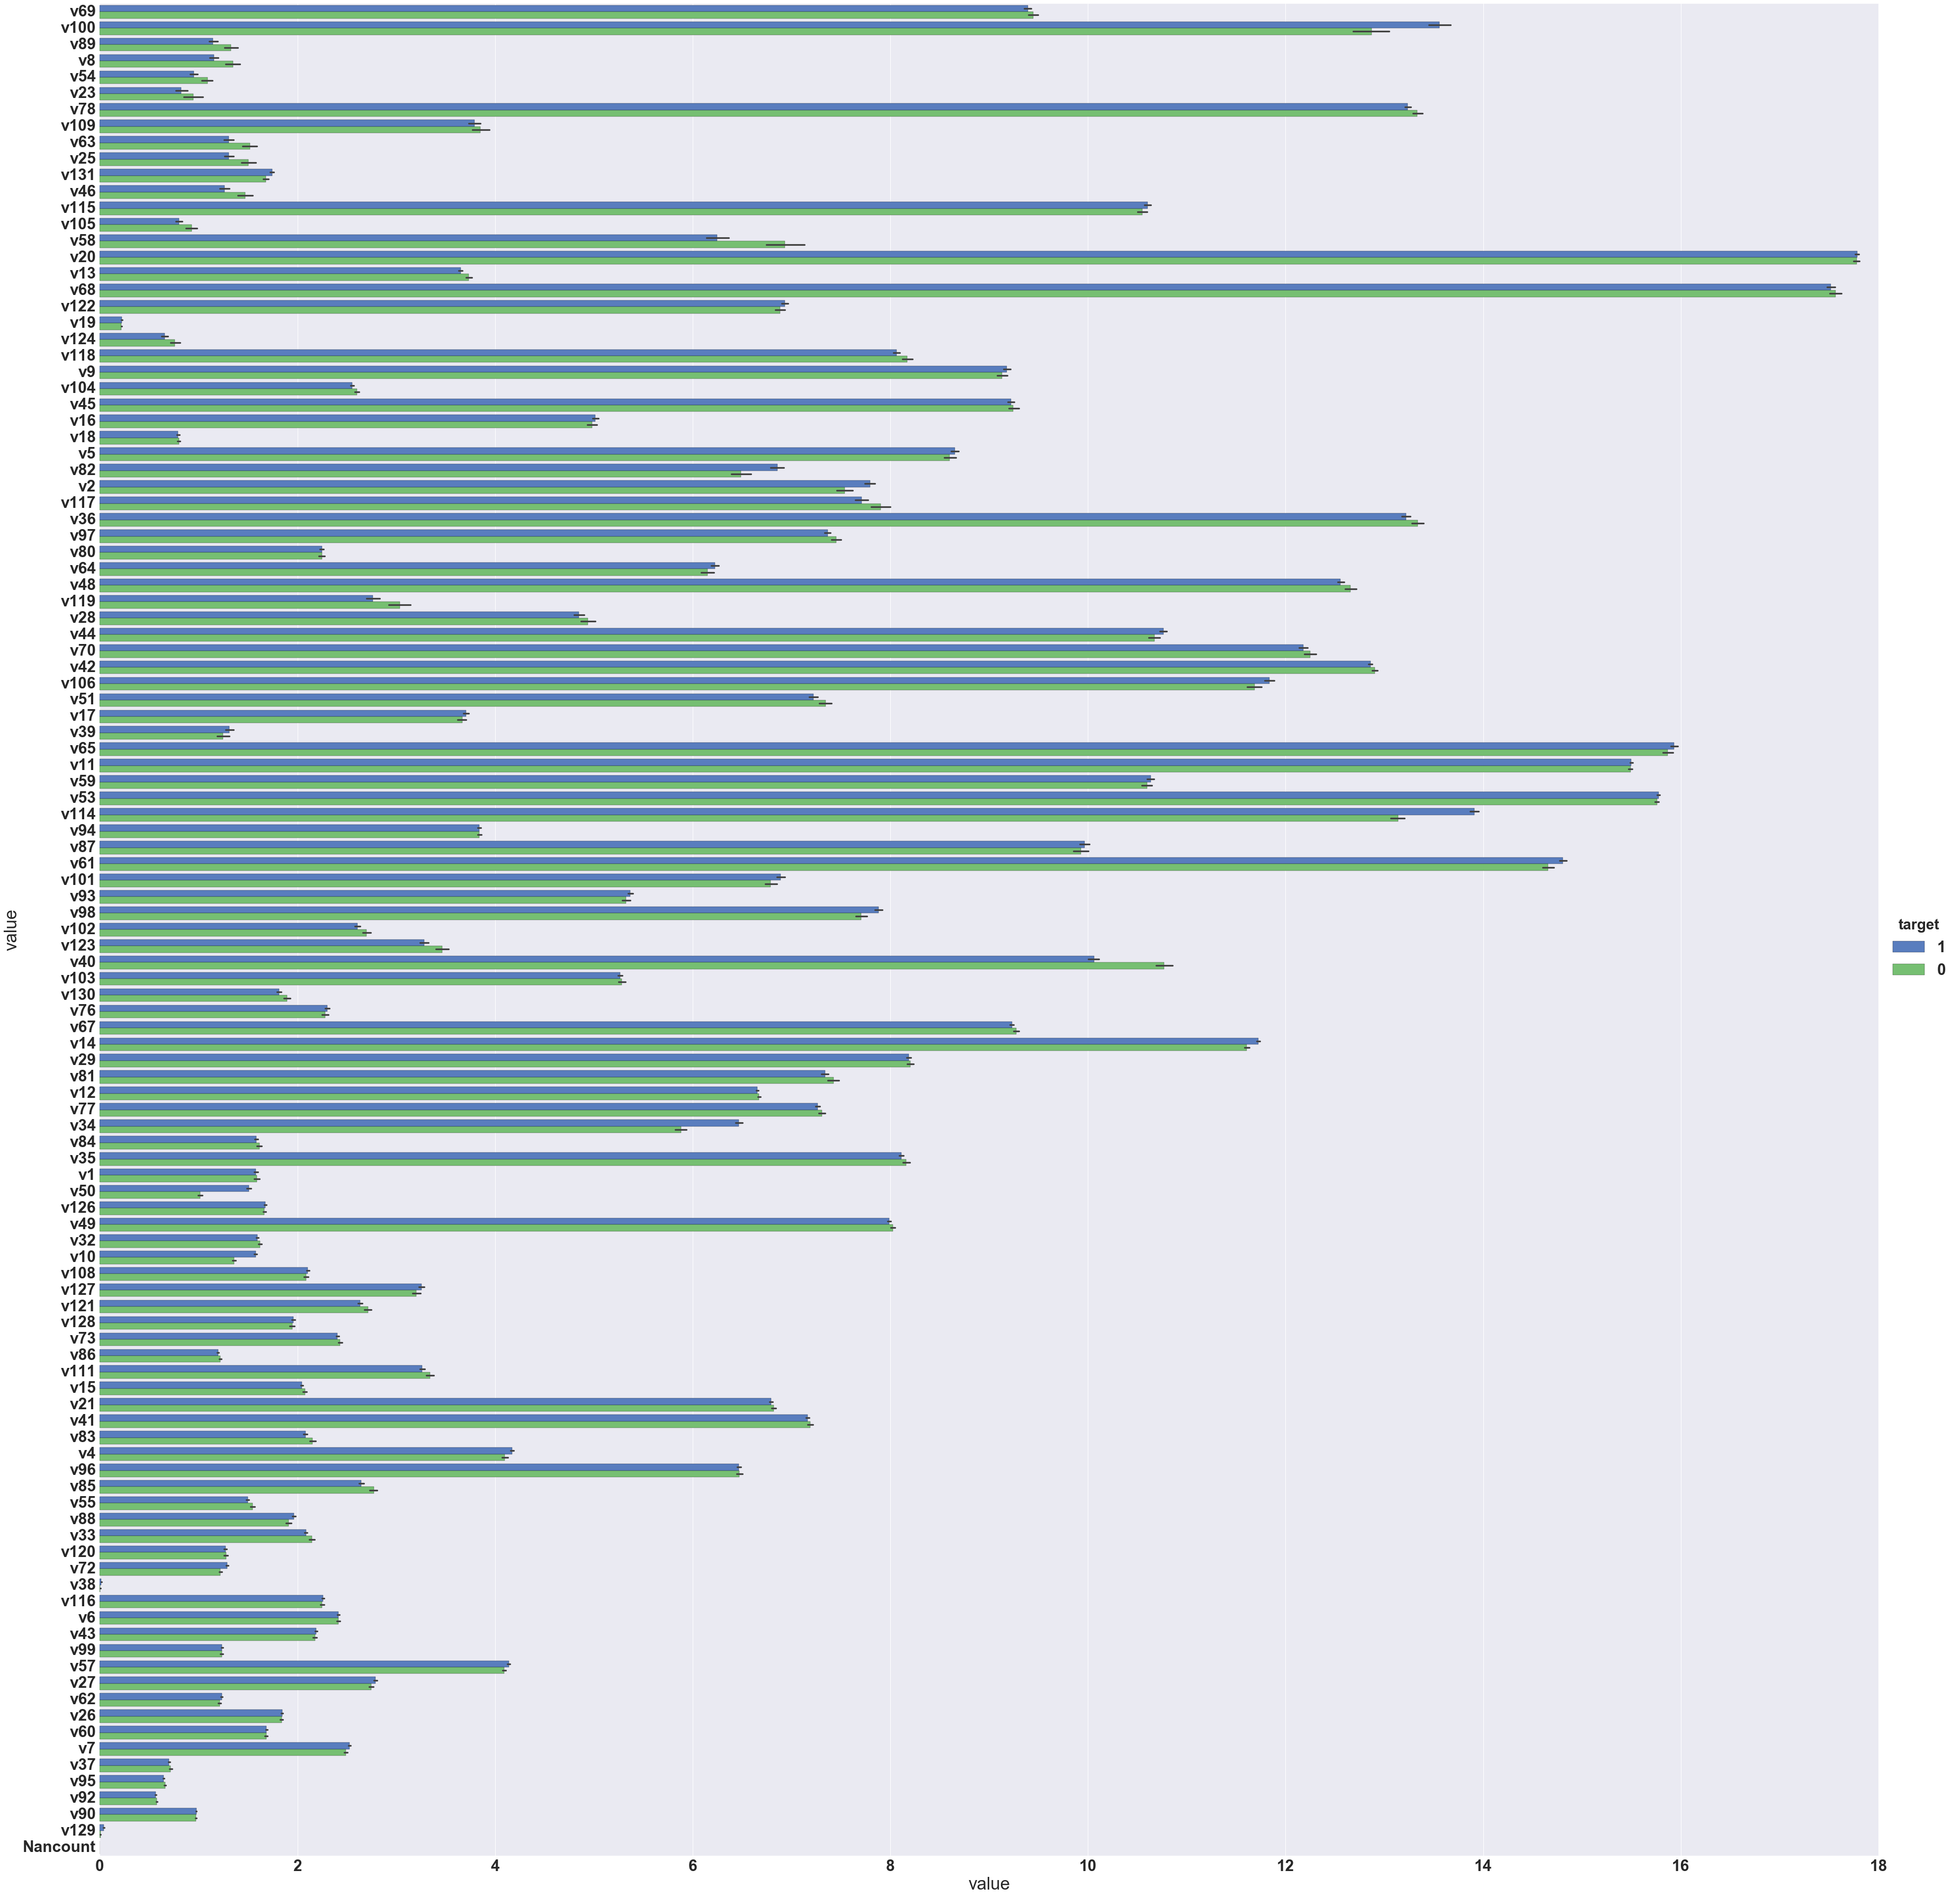

In [56]:
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=3, color_codes=False, rc=None)
#plt.figure(figsize=(300,100))
g = sns.factorplot(y="variable", x="value", hue="target", data=trainmelt.sort(['value'], ascending=False),
                   size=50, kind="bar", palette="muted",orient="h")
g.despine(left=True)
g.set_ylabels("value")


In [61]:
def distplot_subplots(df, Nplotrows, Nplotcols, setxlog=False, figsize=(20,10), legendloc=1, rug=False, rename_features=False, dropzeros=False):

    '''
    Create series of subplots, where each is the distribution plot
    of a different column in df (a pandas dataframe).
    To exclude some columns, run this function on dfplot here:
    dfplot = df.loc[:,list(set(df.columns) - set(['cols','to','exclude'])) ]
    inputs:
    df = a pandas dataframe
    hue = 'hascancer' (column name of the label variable to be plotted)
    huevals = [0, 1] (the unique values in hue)
    huelabels = ['normal','cancer'] (the names of the huevals)
    Nplotrows = 2 (# of rows of subplots to plot)
    Nplotcols = 5 (# of columns of subplots to plot)
    '''

    fig = plt.figure(figsize=figsize)

    n = 1
    for col in df:
        ax = fig.add_subplot(Nplotrows,Nplotcols,n)
        plt.sca(ax)

        if dropzeros:
            sns.distplot(df.loc[~(df[col]==0), col], rug=rug)
        else:
            sns.distplot(df[col], rug=rug)

        # log axes, if desired:
        if setxlog==True:
            ax.set_xscale('log')

#        plt.legend(loc=legendloc)
        n = n + 1

        if rename_features:
            plt.xlabel(feature_names([col])[0])

    fig.tight_layout()


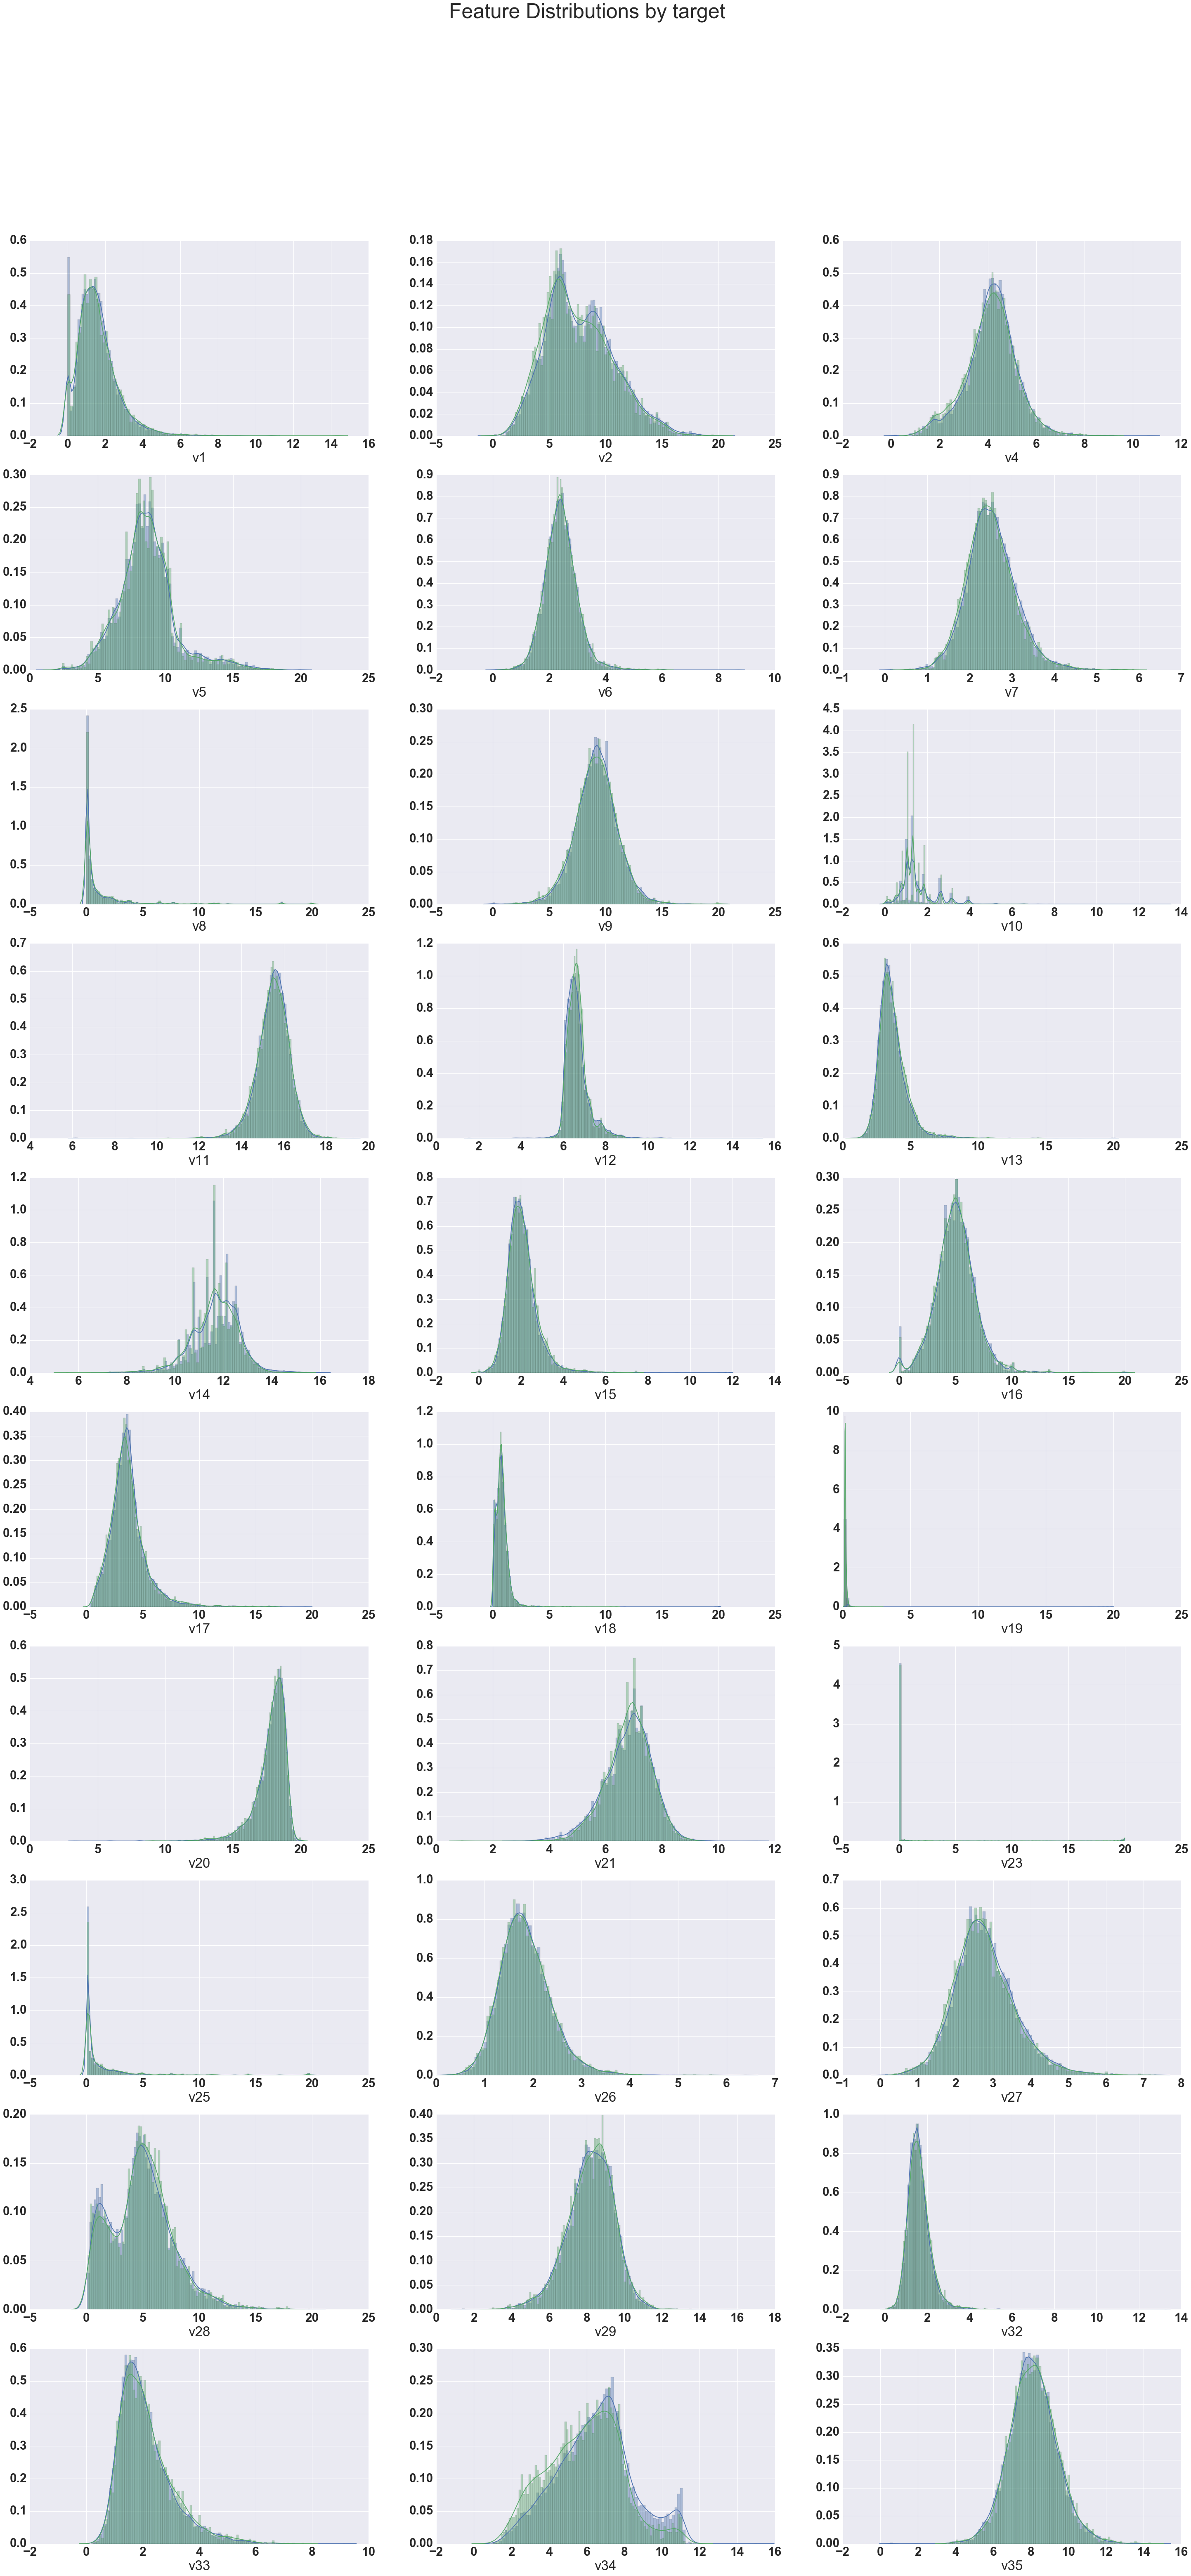

In [131]:

sns.set(font_scale=3)
rawP = trainum.loc[trainum['target']==1, :]
rawN = trainum.loc[trainum['target']==0, :]
fig, axs = matplotlib.pyplot.subplots(10,3,figsize=(50, 100))
fig.suptitle('Feature Distributions by target',fontsize=50)
axs = axs.ravel()
c=0
failist = []
for i in trainum.columns.values[1:]:
    try:
        sns.distplot(rawP[i].dropna(), ax=axs[c], bins=100, kde=True, label='1')
        sns.distplot(rawN[i].dropna(), ax=axs[c], bins=100, kde=True, label='2')
        c+=1
    except:
        failist.append(i)
    


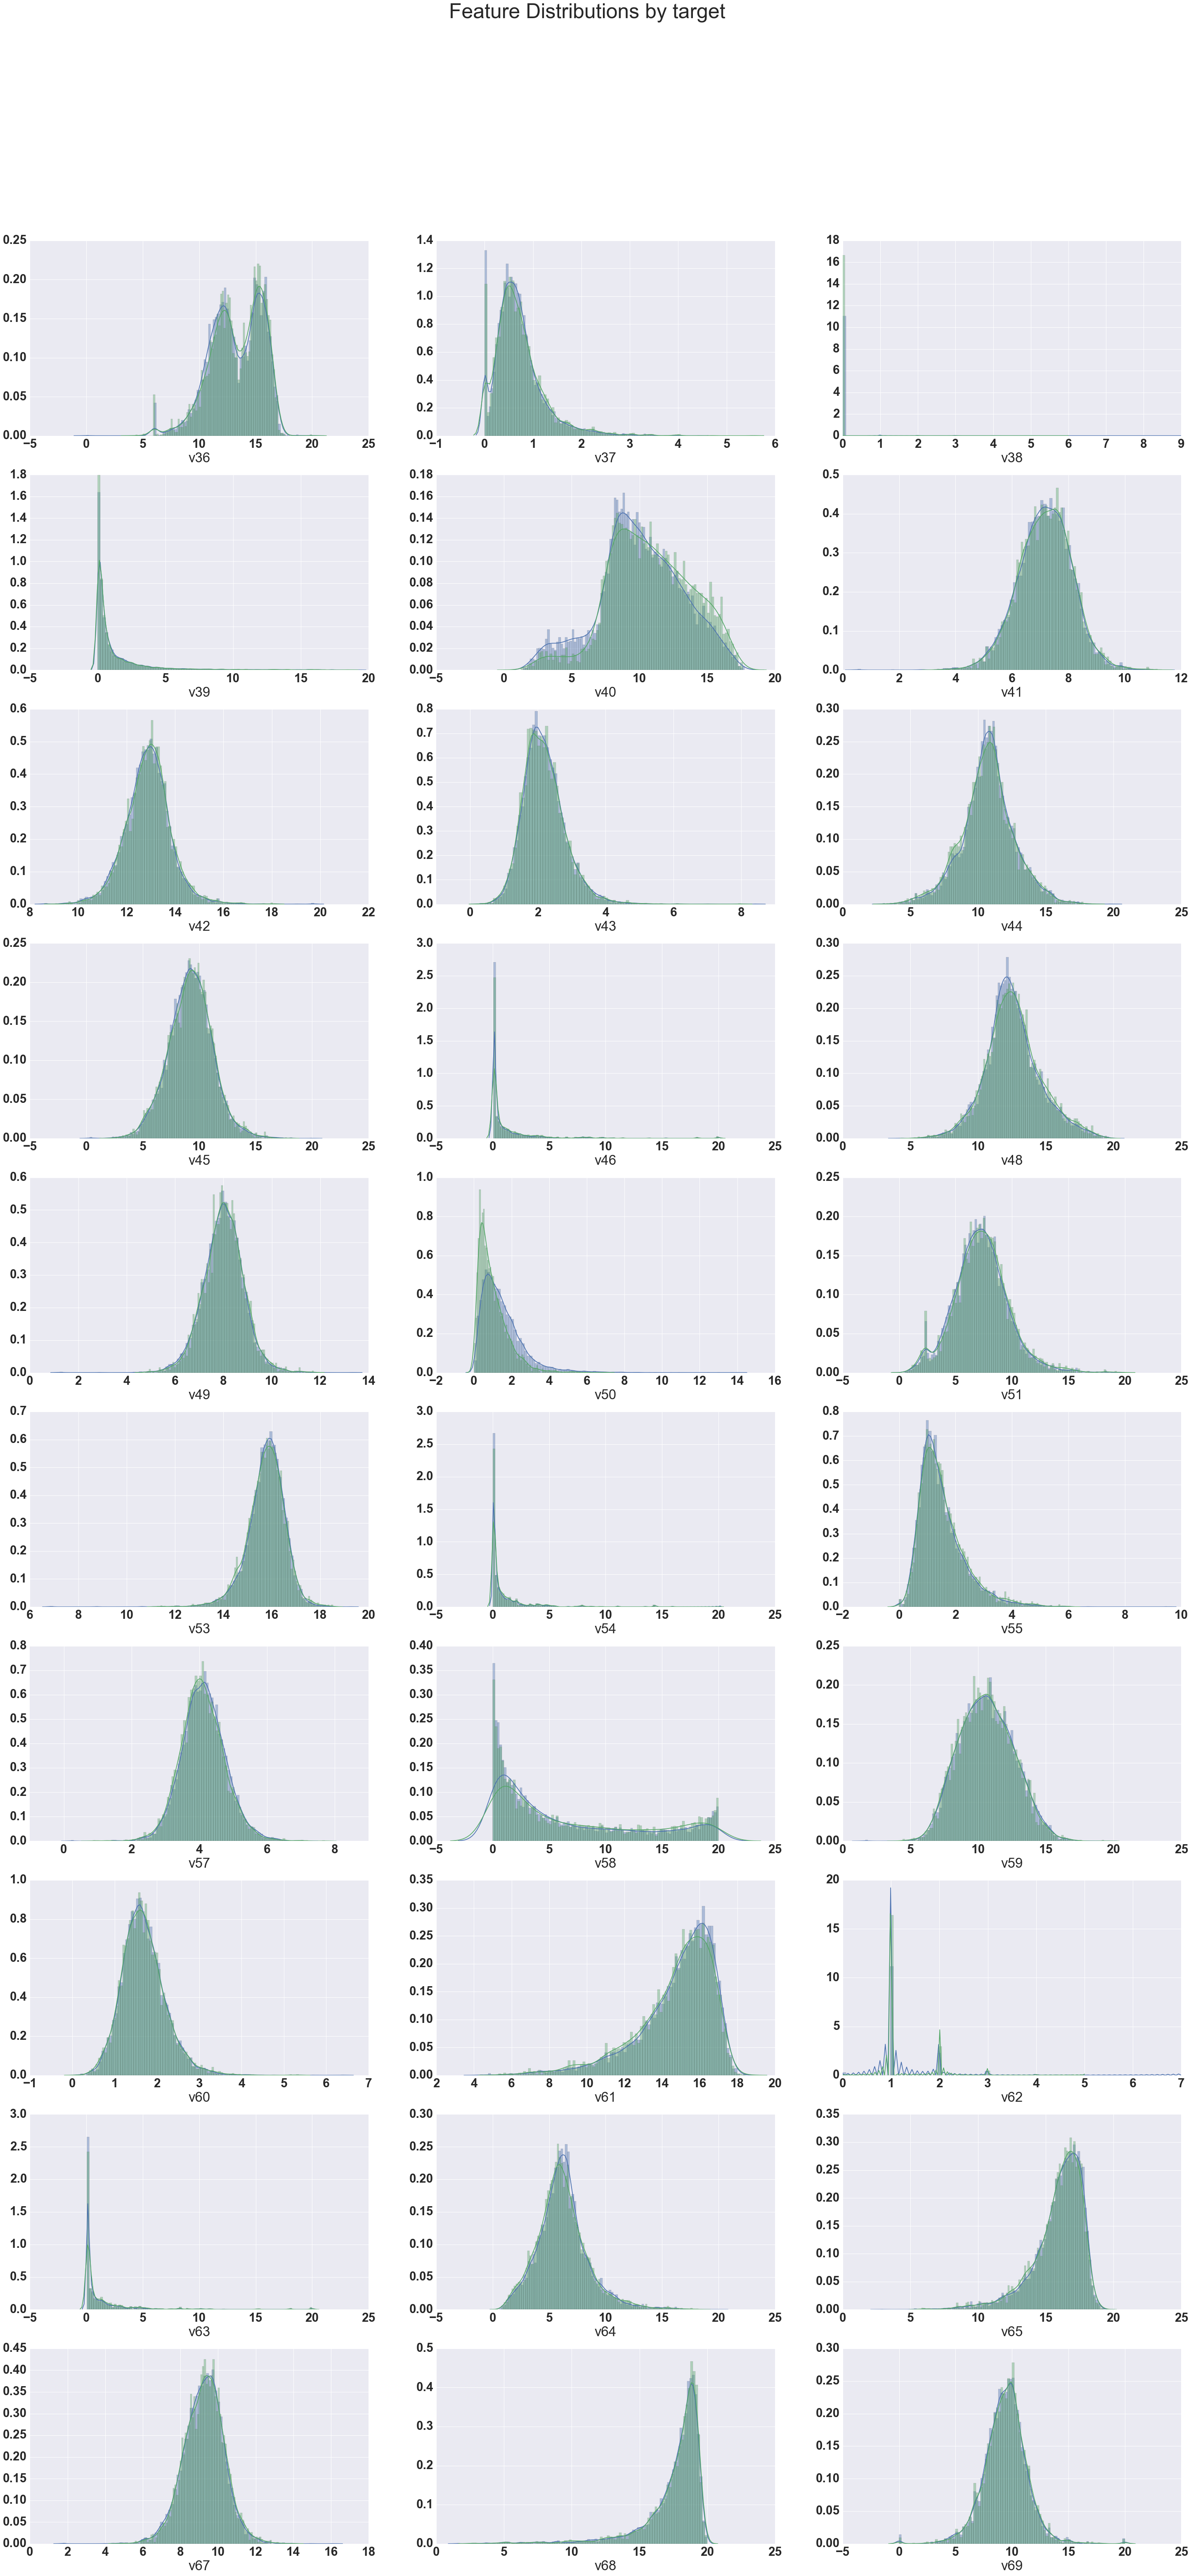

In [129]:
# Distributions by overlaid Diagnosis
sns.set(font_scale=3)
rawP = trainum.loc[trainum['target']==1, :]
rawN = trainum.loc[trainum['target']==0, :]
fig, axs = matplotlib.pyplot.subplots(10,3,figsize=(50, 100))
fig.suptitle('Feature Distributions by target',fontsize=50)
axs = axs.ravel()
c=0
failist = []
for i in trainum.columns.values[31:]:
    try:
        sns.distplot(rawP[i].dropna(), ax=axs[c], bins=100, kde=True, label='Positive')
        sns.distplot(rawN[i].dropna(), ax=axs[c], bins=100, kde=True, label='Negative')
        c+=1
    except:
        failist.append(i)


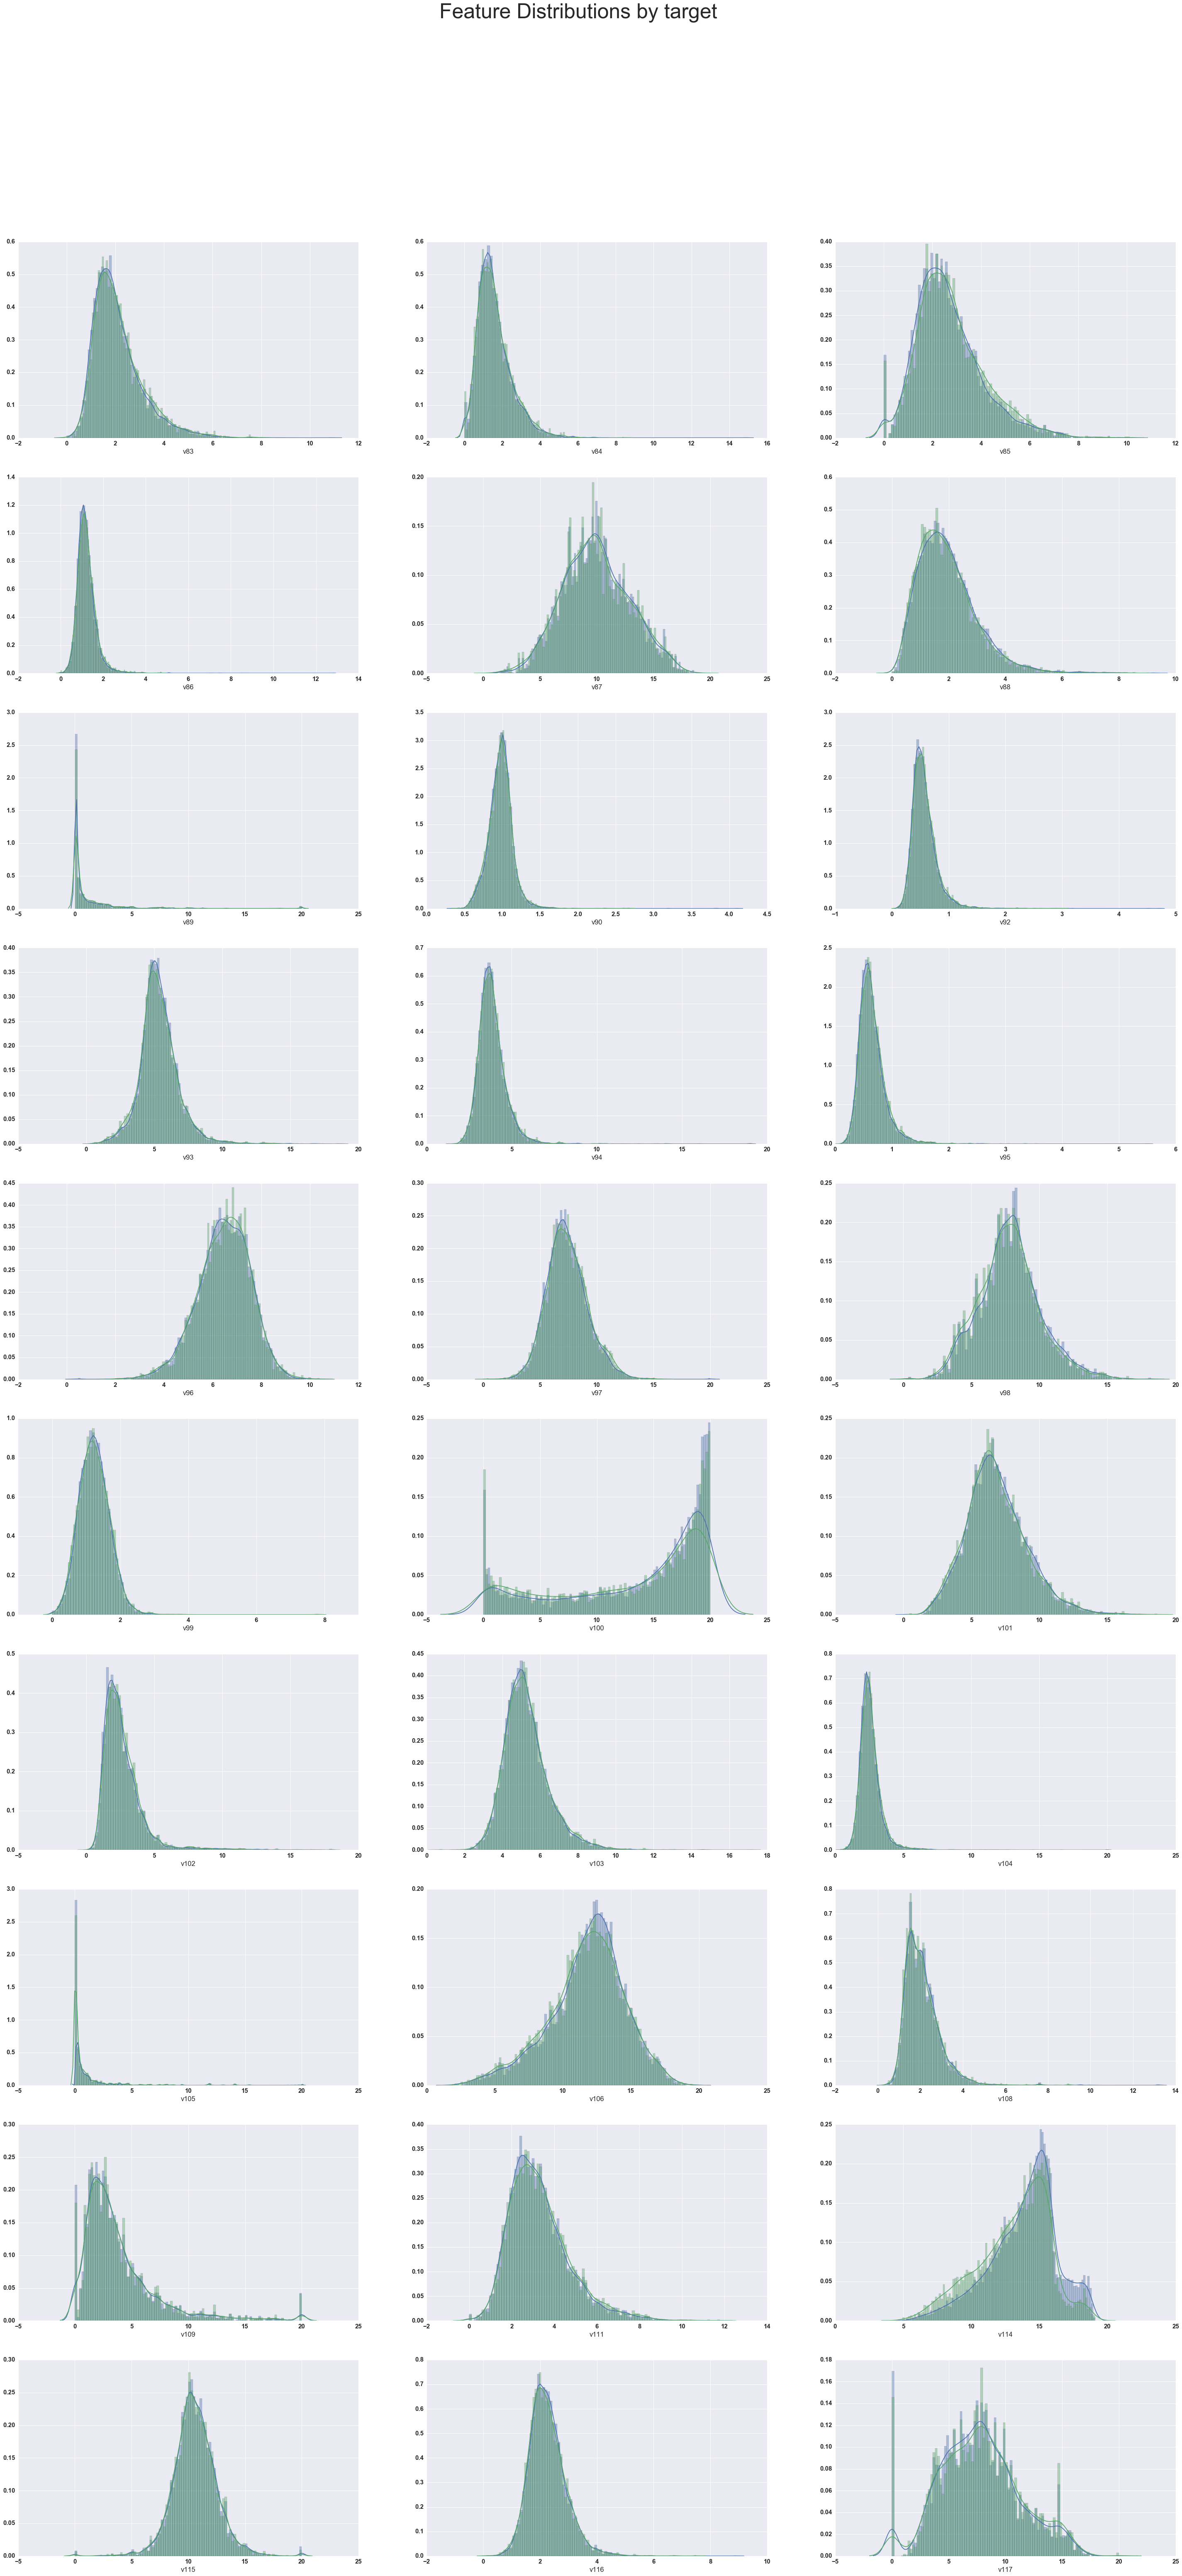

In [121]:

sns.set(font_scale=1.5)
rawP = trainum.loc[trainum['target']==1, :]
rawN = trainum.loc[trainum['target']==0, :]
fig, axs = matplotlib.pyplot.subplots(10,3,figsize=(50, 100))
fig.suptitle('Feature Distributions by target',fontsize=50)
axs = axs.ravel()
c=0
failist = []
for i in trainum.columns.values[70:]:
    try:
        sns.distplot(rawP[i].dropna(), ax=axs[c], bins=100, kde=True, label='Positive')
        sns.distplot(rawN[i].dropna(), ax=axs[c], bins=100, kde=True, label='Negative')
        c+=1
    except:
        failist.append(i)


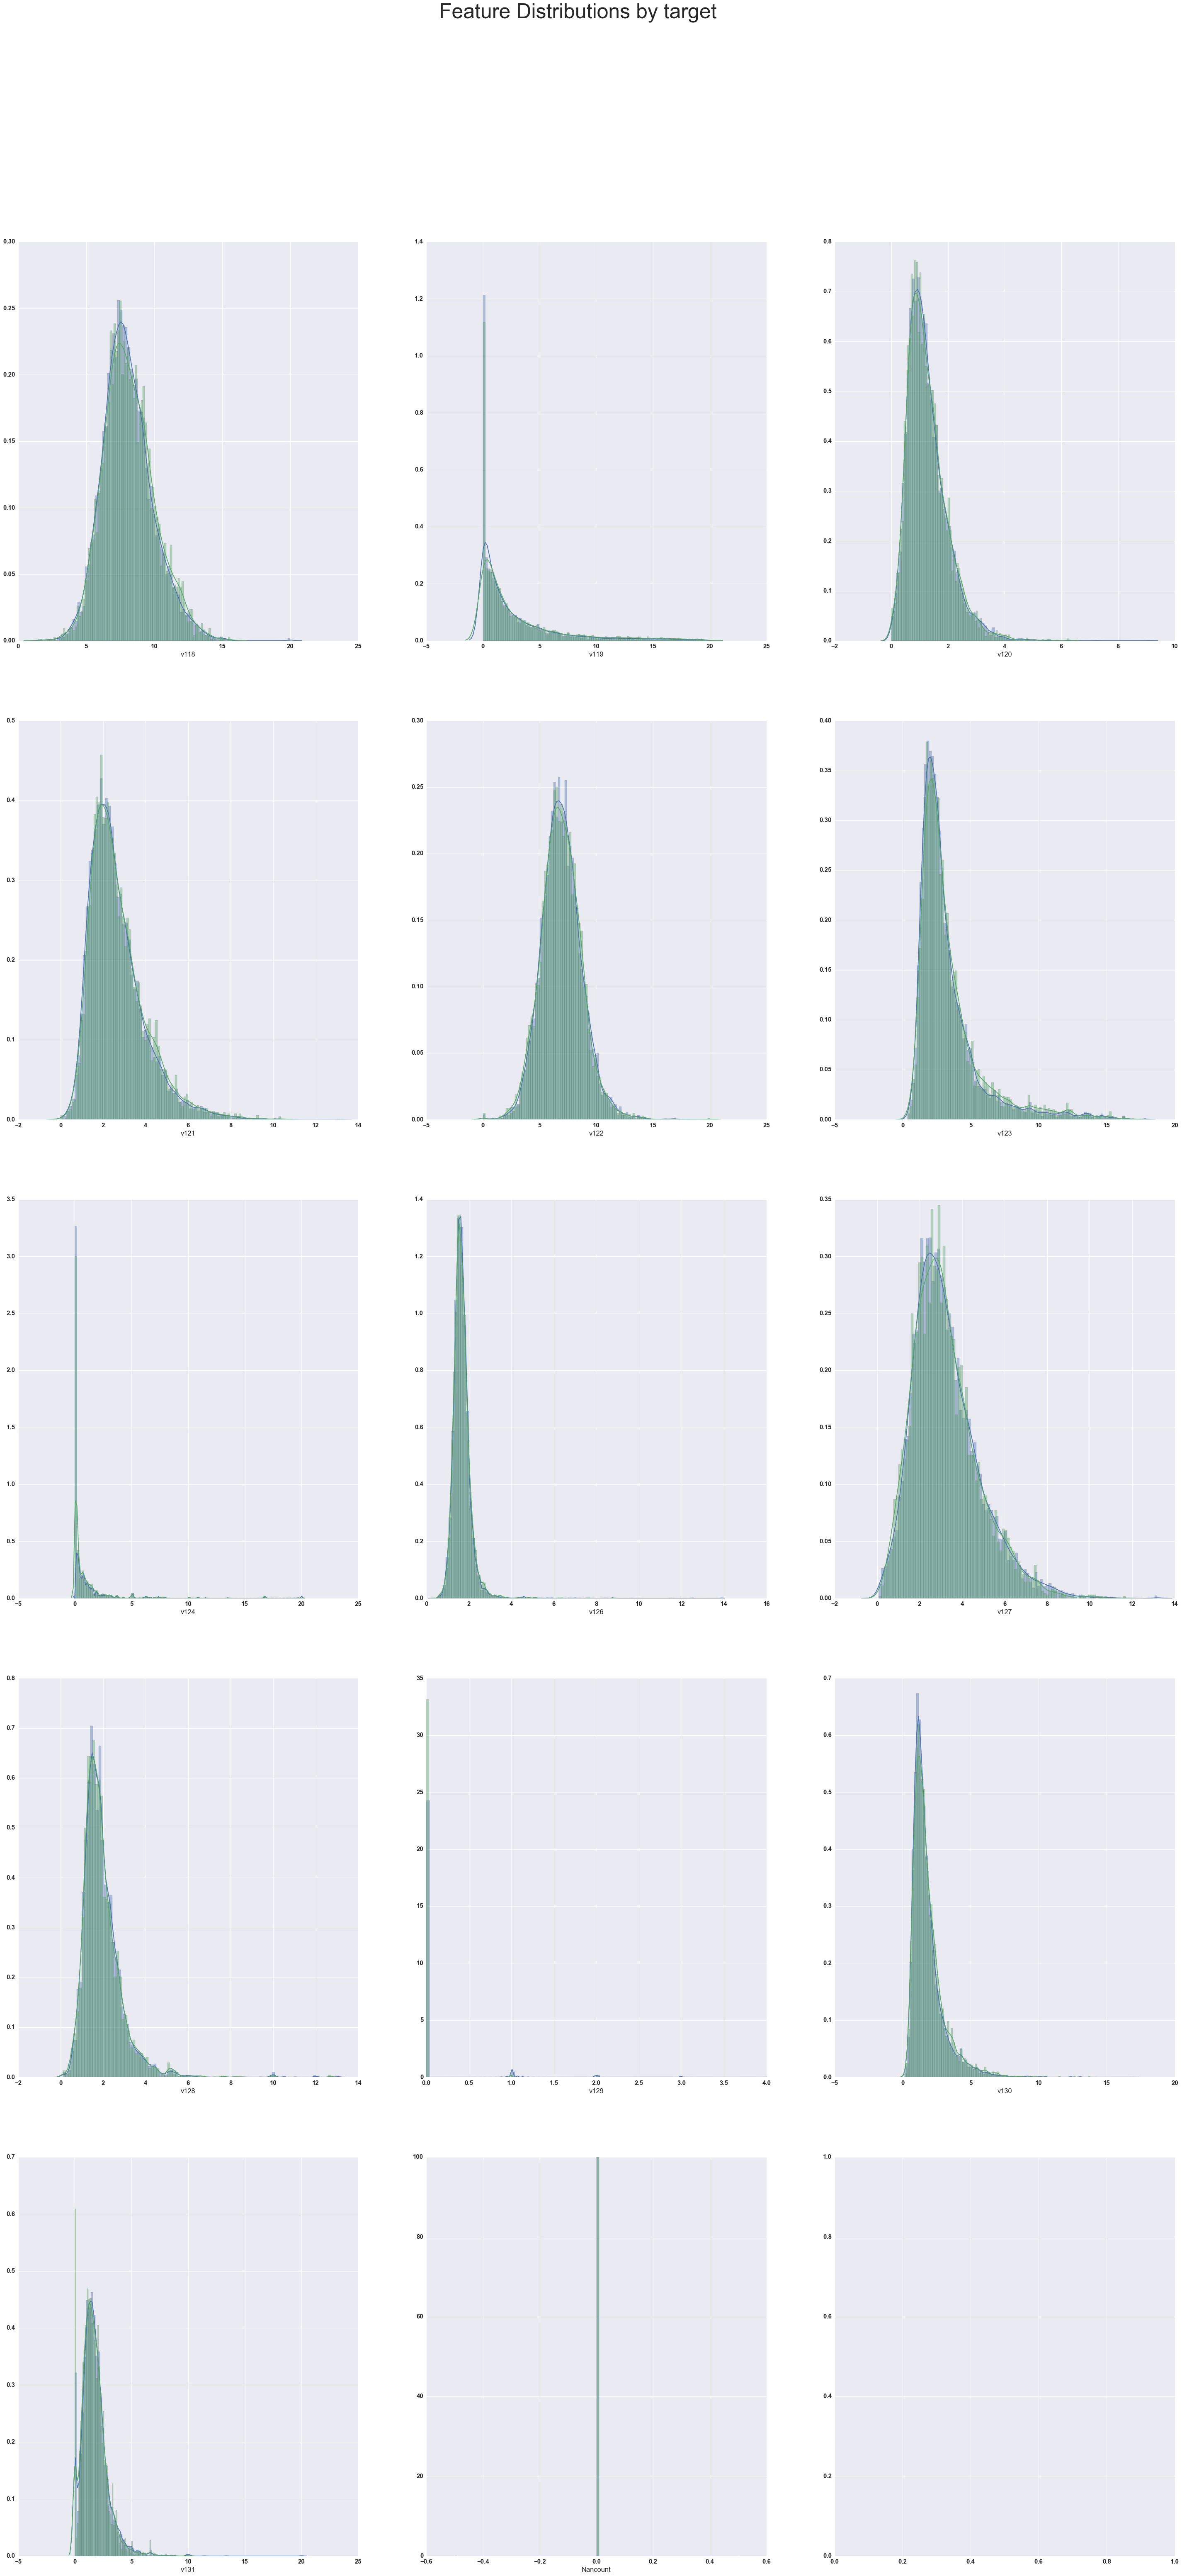

In [139]:
#distributions are very similar for most features. take a look at those that seem to be different
#or have long tails that may be important
sns.set(font_scale=1.5)
rawP = trainum.loc[trainum['target']==1, :]
rawN = trainum.loc[trainum['target']==0, :]
fig, axs = matplotlib.pyplot.subplots(5,3,figsize=(50, 100))
fig.suptitle('Feature Distributions by target',fontsize=50)
axs = axs.ravel()
c=0
failist = []
for i in trainum.columns.values[100:]:
    try:
        sns.distplot(rawP[i].dropna(), ax=axs[c], bins=100, kde=True, label='Positive')
        sns.distplot(rawN[i].dropna(), ax=axs[c], bins=100, kde=True, label='Negative')
        c+=1
    except:
        failist.append(i)


In [18]:
#tried to look at correlation between features but there are so many that the correlation plot is
#difficult to interpret
def plot_corr(trainumeric,size=20):
    corr = trainumeric.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

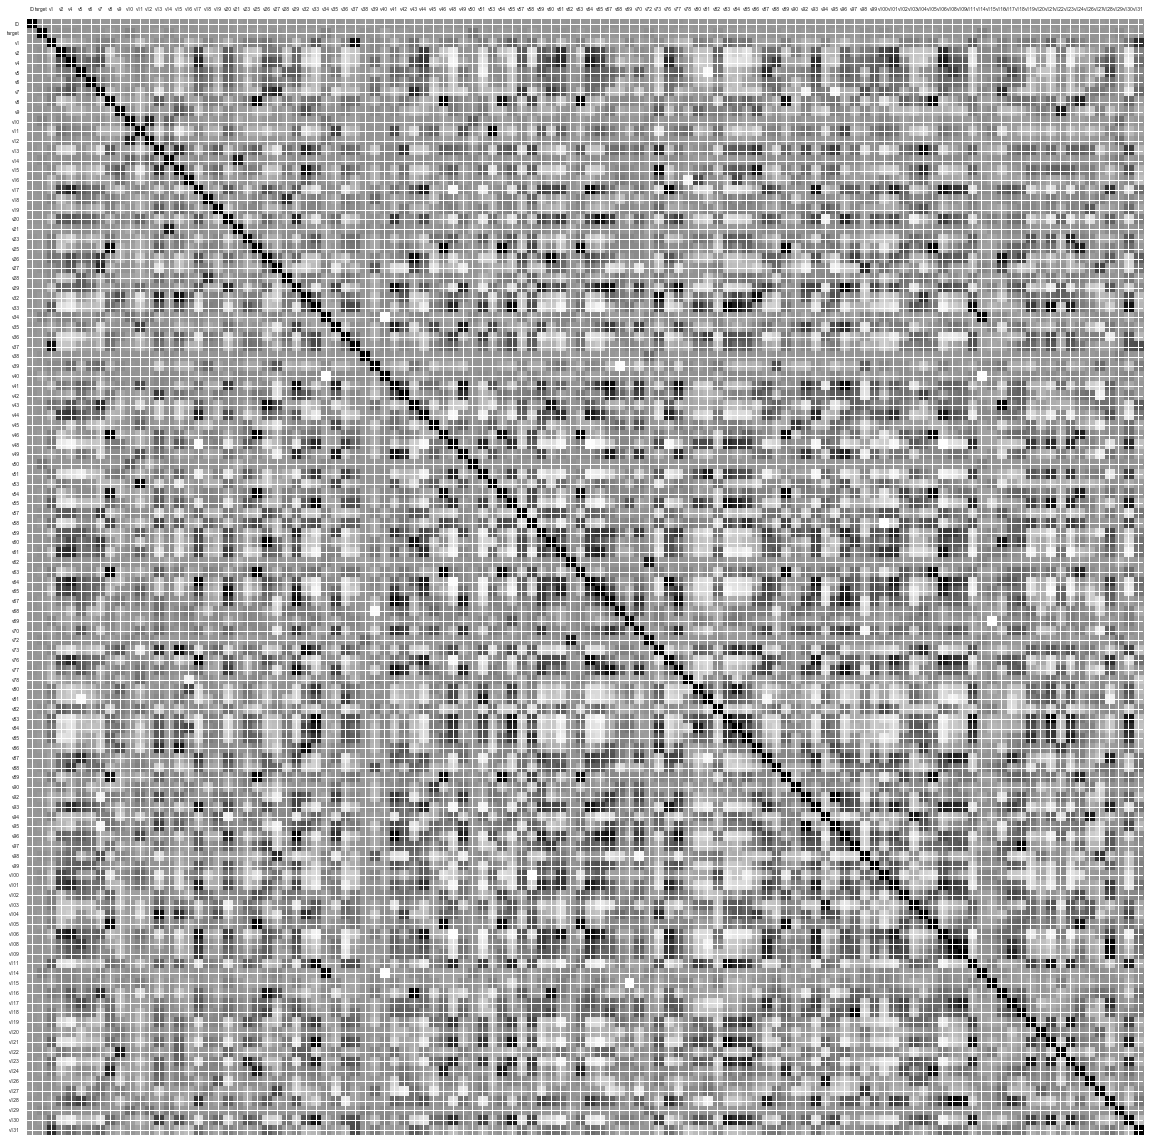

In [19]:
plot_corr(trainumeric, size=20) #not very useful because too many features

In [23]:
dfcor = trainumeric.corr()

In [25]:
type(dfcor)

pandas.core.frame.DataFrame

In [26]:
dfcor

ID    target        v1        v2        v4        v5        v6  \
ID      1.000000  0.011119  0.002238 -0.000670 -0.013512  0.002859  0.009516   
target  0.011119  1.000000 -0.003343  0.039517  0.032588  0.011894  0.000334   
v1      0.002238 -0.003343  1.000000 -0.215388 -0.130375 -0.071507  0.017571   
v2     -0.000670  0.039517 -0.215388  1.000000  0.499268  0.186109 -0.018481   
v4     -0.013512  0.032588 -0.130375  0.499268  1.000000  0.225279  0.362782   
v5      0.002859  0.011894 -0.071507  0.186109  0.225279  1.000000  0.246461   
v6      0.009516  0.000334  0.017571 -0.018481  0.362782  0.246461  1.000000   
v7      0.000834  0.030044  0.126327  0.310500  0.477966  0.045236  0.187051   
v8      0.001318 -0.034715  0.141762 -0.357906 -0.203911  0.001156  0.029166   
v9      0.005659  0.011652 -0.029261  0.019040 -0.171717 -0.159652 -0.057253   
v10     0.002216  0.123624 -0.041211  0.076868  0.035245 -0.017015 -0.029389   
v11     0.000054  0.006178 -0.278812  0.231526  0.130786  0.100158  0.058129   
v12     0.005320 -0.013704 -0.046467  0.076504  0.043871 -0.016684 -0.012673   
v13     0.010647 -0.035825  0.049384 -0.404504 -0.489650  0.010399 -0.144201   
v14    -0.011803  0.056797 -0.010726  0.033508  0.051658  0.041723  0.024176   
v15     0.004593 -0.019583  0.046860 -0.307259 -0.464833 -0.123677 -0.227953   
v16     0.009391  0.008637 -0.202454  0.020212 -0.147286  0.002425 -0.136020   
v17     0.001246  0.011256 -0.106785  0.571378  0.759258  0.403490  0.294833   
v18    -0.011020 -0.004910  0.103400 -0.229644 -0.059345  0.229433  0.186664   
v19     0.006378  0.002489 -0.020934 -0.154517 -0.207787 -0.044383 -0.140677   
v20     0.006540  0.002379 -0.171641  0.414138  0.447593  0.366885  0.331024   
v21    -0.016468 -0.015246  0.014194 -0.007415  0.030412  0.057838  0.041222   
v23     0.002914 -0.015785  0.166689 -0.288411 -0.422789 -0.097519 -0.210479   
v25     0.000843 -0.034244  0.145840 -0.331375 -0.135738  0.044277  0.053663   
v26     0.002096  0.003833  0.237840  0.202989  0.503537  0.236052  0.335305   
v27    -0.014094  0.024272  0.069152  0.180534  0.434316 -0.082907  0.176723   
v28    -0.004229 -0.015090  0.051524 -0.267766 -0.204266  0.383652  0.086805   
v29     0.015575 -0.005735 -0.221227  0.331630  0.305384  0.418042  0.282560   
v32     0.009754 -0.023760  0.031584 -0.288464 -0.476334 -0.047655 -0.167959   
v33     0.003626 -0.029451  0.419989 -0.571595 -0.671989 -0.292258 -0.254610   
v34    -0.021220  0.132866 -0.021297  0.116420  0.099100  0.012594 -0.003293   
v35     0.011329 -0.018302 -0.126711  0.022096 -0.122696  0.205804  0.029793   
v36    -0.003927 -0.024011  0.134121 -0.485473 -0.536350 -0.389669 -0.154476   
v37     0.001147 -0.016562  0.900882 -0.331455 -0.324183 -0.089769 -0.063800   
v38    -0.017990  0.028472 -0.008952  0.003143  0.017068 -0.005849 -0.010148   
v39    -0.010271  0.011789  0.079934  0.073767  0.294294 -0.122991  0.229244   
v40     0.022413 -0.104374  0.011135 -0.099680 -0.092745 -0.017407 -0.004297   
v41     0.017752 -0.014182 -0.164945  0.198114  0.094428  0.347245  0.204424   
v42     0.021546 -0.022366  0.012893 -0.067043 -0.163271  0.260903  0.029231   
v43    -0.005368  0.011134  0.267951  0.151526  0.496263  0.096349  0.272879   
v44    -0.003294  0.021382 -0.181362  0.618124  0.656538  0.420953  0.229930   
v45     0.010752 -0.005562 -0.050950  0.016936 -0.343858  0.058000 -0.247548   
v46     0.001207 -0.035726  0.141464 -0.351453 -0.154853  0.015957  0.050063   
v48    -0.000273 -0.022382  0.182697 -0.686292 -0.824727 -0.398620 -0.326288   
v49     0.018495 -0.018906 -0.111014  0.018382 -0.130561  0.228156  0.074008   
v50    -0.004377  0.214037  0.003959  0.007620 -0.009481 -0.002055 -0.027375   
v51    -0.002244 -0.023529  0.180010 -0.458512 -0.604254 -0.718772 -0.337100   
v53     0.001564  0.010735 -0.171925  0.187833  0.050086  0.060524  0.003140   
v54     0.001688 -0.030664  0.147424 -0.305894 -0.101089  0.061062  0.053403   
v55     0.0070

In [ ]:
#need to actually do predictions here